## Problem Statement

You are looking to buy a property in Kings County but you are not sure about what are the factors that affect the prices of houses. You have heard from your colleagues that brokers sometimes charge more than the actual cost of the house. Also, Since this is your first house you are not aware of the factors that affect the cost of the house. So in order to make a smart decision you decided to get some insights using the dataset provided.
* Can you predict house prices using the features and data available of King County.
* List the top 10 Zip Codes that have the highest house prices and the lowest prices.
* List top five features that contribute to house pricing.
* Is there a correlation between the location and  price?


## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Imports](#2.1_Imports)
  * [2.3 Data Loading](#2.3_Data_Loading)
  * [2.4 Checking if ID is a unique Identifier](#2.4_Checking_if_ID_is_a_unique_Identifier)
  * [2.5 Change Datatype of Date Column](#2.5_Change_Datatype_of_Date_Column)
  * [2.6 Exploring Variables](#2.6_Exploring_Variables)

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Data Loading

In [2]:
data = pd.read_csv(r'..\Data\kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
Column_Names = ['Id', 'Transaction_Date','Price', 'Bedroom_Count', 'Bathroom_Count',
               'Sqft_Living', 'Sqft_Plot', 'Floor_Count', 'Waterfront', 'View',
               'Condition', 'Grade', 'Sqft_Above', 'Sqft_Basement', 'Year_Built',
               'Year_Renovated', 'Zipcode', 'Latitude', 'Longitude', 'Sqft_Living_2015', 'Sqft_Plot_2015']
data.columns = Column_Names

Challenge:- Choosing Data types of columns. Specially how to treat latitude and longitude. There was something about geohash but will leave that for later.

In [6]:
data['Id'] = data['Id'].astype('object')
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
data['Zipcode'] = data['Zipcode'].astype('object')

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
Bedroom_Count,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
Bathroom_Count,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
Sqft_Living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
Sqft_Plot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
Floor_Count,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
Waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
View,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
Condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
Grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


**Observations**
* Price of Listing in this dataset ranges from 75K to 7.7M.
* There are houses with 0 bedrooms and 1 with 33 bedrooms
* There are houses with 0 bathrooms
* There is major outliers in Sqft_plot
* Mean Condition of the houses in this listings is 3.4
* Mean Grade of the houses in this listing is 7.6
* Properties in the dataset are built between 1900 and 2015, also there are alot of houses that has not done any renovation since the value is zero till 75th Percentile. 

### Exploring Variables
#### Id

In [8]:
# Counting the number of unique Columns
len(data['Id'].unique())

21436

In [9]:
# Counting the number of duplicate entries for each id
(data.Id).value_counts(ascending = False)

795000620     3
1250201165    2
324000530     2
9136103130    2
6117501820    2
             ..
8075400570    1
422069067     1
509000090     1
5379806590    1
1777500160    1
Name: Id, Length: 21436, dtype: int64

In [10]:
data.loc[data['Id'] == 1250201165].T

,14220,14221
Id,1250201165,1250201165
Transaction_Date,2014-11-21 00:00:00,2015-03-17 00:00:00
Price,441000,474500
Bedroom_Count,5,5
Bathroom_Count,2.5,2.5
Sqft_Living,2000,2000
Sqft_Plot,3600,3600
Floor_Count,1,1
Waterfront,0,0
View,0,0


In [11]:
data.loc[data['Id'] == 795000620].T

,17602,17603,17604
Id,795000620,795000620,795000620
Transaction_Date,2014-09-24 00:00:00,2014-12-15 00:00:00,2015-03-11 00:00:00
Price,115000,124000,157000
Bedroom_Count,3,3,3
Bathroom_Count,1,1,1
Sqft_Living,1080,1080,1080
Sqft_Plot,6250,6250,6250
Floor_Count,1,1,1
Waterfront,0,0,0
View,0,0,0


In [12]:
# Droping rows with same id, keeping the last recorded price
Housing_data = data.drop_duplicates(['Id'], keep = 'last')
Housing_data.head()

,Id,Transaction_Date,Price,Bedroom_Count,Bathroom_Count,Sqft_Living,Sqft_Plot,Floor_Count,Waterfront,View,...,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,Zipcode,Latitude,Longitude,Sqft_Living_2015,Sqft_Plot_2015
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Bedroom_Count

In [13]:
Housing_data.Bedroom_Count.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [14]:
Housing_data[(Housing_data.Bedroom_Count == 33)]

,Id,Transaction_Date,Price,Bedroom_Count,Bathroom_Count,Sqft_Living,Sqft_Plot,Floor_Count,Waterfront,View,...,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,Zipcode,Latitude,Longitude,Sqft_Living_2015,Sqft_Plot_2015
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [15]:
# Droping House with 33 bedrooms
Housing_data = Housing_data[~(Housing_data.Bedroom_Count == 33)]

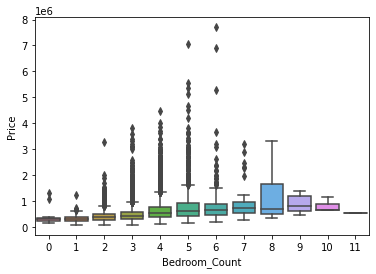

In [16]:
sns.boxplot(x = 'Bedroom_Count', y = 'Price', data = Housing_data);

Obervation :- 
* Median Price of the house increases with increase in number of bedrooms
* There are houses with 0 bedrooms

In [17]:
Housing_data[Housing_data['Bedroom_Count'] == 6].sort_values(by = 'Price', ascending = False).head().T

,7252,9254,1315,6508,7907
Id,6762700020,9208900037,7558700030,4217402115,1068000375
Transaction_Date,2014-10-13 00:00:00,2014-09-19 00:00:00,2015-04-13 00:00:00,2015-04-21 00:00:00,2014-09-23 00:00:00
Price,7.7e+06,6.885e+06,5.3e+06,3.65e+06,3.2e+06
Bedroom_Count,6,6,6,6,6
Bathroom_Count,8,7.75,6,4.75,5
Sqft_Living,12050,9890,7390,5480,7100
Sqft_Plot,27600,31374,24829,19401,18200
Floor_Count,2.5,2,2,1.5,2.5
Waterfront,0,0,1,1,0
View,3,4,4,4,0


In [18]:
Housing_data[Housing_data['Bedroom_Count'] == 5].sort_values(by = 'Price', ascending = False).head().T

,3914,4411,1448,1164,8092
Id,9808700762,2470100110,8907500070,1247600105,1924059029
Transaction_Date,2014-06-11 00:00:00,2014-08-04 00:00:00,2015-04-13 00:00:00,2014-10-20 00:00:00,2014-06-17 00:00:00
Price,7.0625e+06,5.57e+06,5.35e+06,5.1108e+06,4.668e+06
Bedroom_Count,5,5,5,5,5
Bathroom_Count,4.5,5.75,5,5.25,6.75
Sqft_Living,10040,9200,8000,8010,9640
Sqft_Plot,37325,35069,23985,45517,13068
Floor_Count,2,2,2,2,1
Waterfront,1,0,0,1,1
View,2,0,4,4,4


Oberservtion:- There is a huge difference between the sqft lot and living between origin and recorded in 2015

#### Bathrooms

In [19]:
Housing_data.Bathroom_Count.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

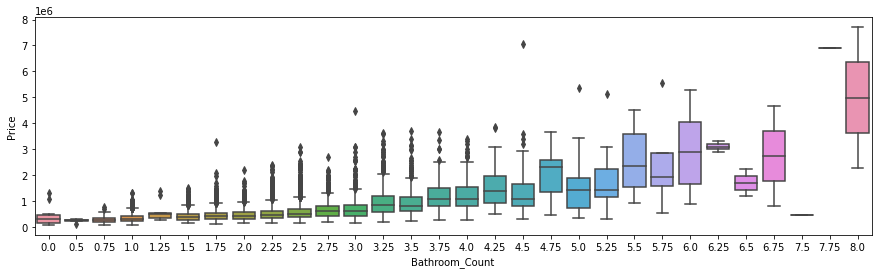

In [20]:
fig = plt.figure(figsize = (15, 4))
sns.boxplot(x = 'Bathroom_Count', y = 'Price', data = Housing_data);

Obeservations:- 
* Variability in the price increases with the increase in bathroom count.
* There are houses with 0 Bathrooms

#### Dealing with 0 bedrooms or 0 bathrooms

In [21]:
Housing_data[(Housing_data.Bathroom_Count == 0) | (Housing_data.Bedroom_Count == 0)]

,Id,Transaction_Date,Price,Bedroom_Count,Bathroom_Count,Sqft_Living,Sqft_Plot,Floor_Count,Waterfront,View,...,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,Zipcode,Latitude,Longitude,Sqft_Living_2015,Sqft_Plot_2015
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,2015-02-17,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
5832,5702500050,2014-11-04,280000.0,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050


In [22]:
Housing_data = Housing_data[~((Housing_data.Bathroom_Count == 0) | (Housing_data.Bedroom_Count == 0))]

#### Floor_Count

In [23]:
Housing_data.Floor_Count.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

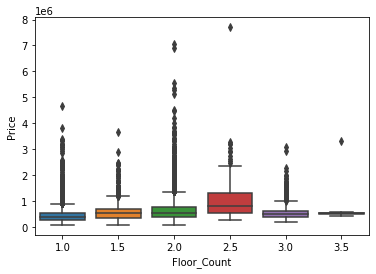

In [24]:
sns.boxplot(x = 'Floor_Count', y = 'Price', data = Housing_data);

#### Water Front

In [25]:
Housing_data.Waterfront.unique()

array([0, 1], dtype=int64)

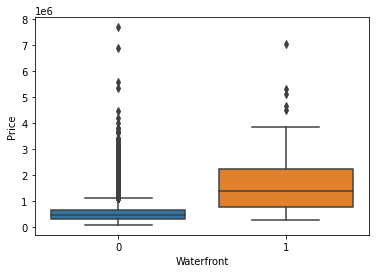

In [26]:
sns.boxplot(x = 'Waterfront', y = 'Price', data = Housing_data);

Water front has binary values

#### View

In [27]:
Housing_data.View.unique()

array([0, 3, 4, 2, 1], dtype=int64)

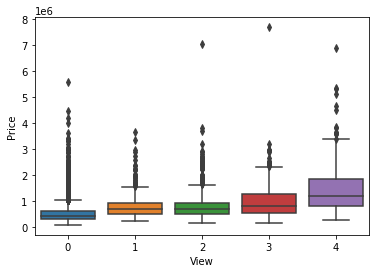

In [28]:
sns.boxplot(x = 'View', y = 'Price', data = Housing_data);

Obeservation:- 
* There is not much change in price wrt to view.


#### Condition

In [29]:
Housing_data.Condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Condition', ylabel='Price'>

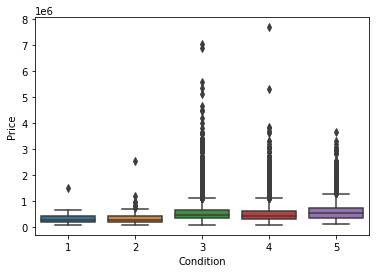

In [30]:
sns.boxplot(x = 'Condition', y = 'Price', data = Housing_data)

#### Grade

In [31]:
Housing_data.Grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

<AxesSubplot:xlabel='Grade', ylabel='Price'>

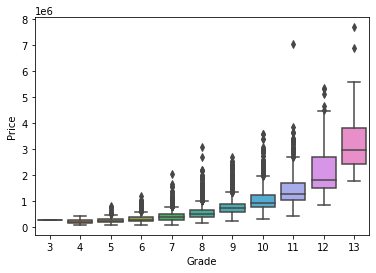

In [32]:
sns.boxplot(x = 'Grade', y = 'Price', data = Housing_data)

In [33]:
Housing_data.groupby('Condition')['Grade'].unique()

Condition
1                       [5, 6, 8, 7, 4]
2                [7, 4, 6, 5, 8, 10, 9]
3    [7, 6, 8, 11, 9, 10, 12, 5, 4, 13]
4    [7, 8, 6, 9, 11, 10, 5, 12, 4, 13]
5        [7, 6, 8, 9, 5, 10, 3, 11, 12]
Name: Grade, dtype: object

Observation:- Each group made by Condition includes various ranges of Grades

#### Year_Build and Year_Renovated

In [34]:
Housing_data['Year_Built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

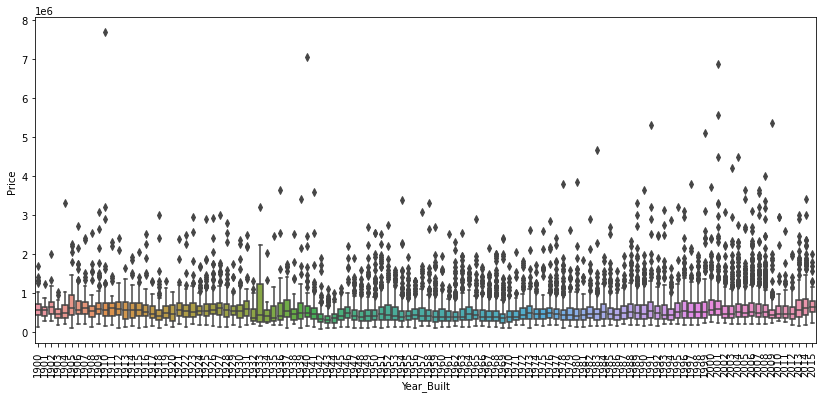

In [35]:
fig = plt.figure(figsize = (14, 6))
sns.boxplot(x = 'Year_Built', y = 'Price', data = Housing_data);
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='Year_Built', ylabel='Price'>

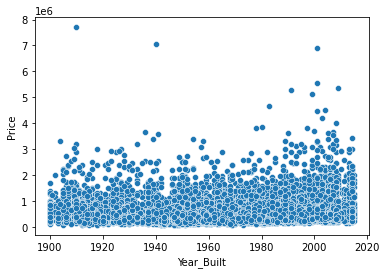

In [36]:
sns.scatterplot(x = 'Year_Built', y = 'Price', data = Housing_data)

In [37]:
Housing_data['Year_Renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

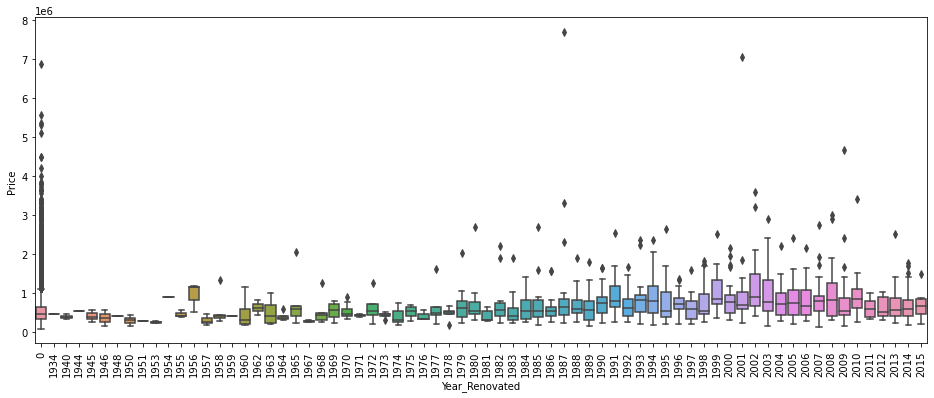

In [38]:
fig = plt.figure(figsize = (16, 6))
sns.boxplot(x = 'Year_Renovated', y = 'Price', data = Housing_data);
plt.xticks(rotation = 90);

##### Checking if year of renovation is less than year of built

In [39]:
Housing_data[(Housing_data['Year_Built'] > Housing_data['Year_Renovated']) & Housing_data['Year_Renovated'] != 0 ]

,Id,Transaction_Date,Price,Bedroom_Count,Bathroom_Count,Sqft_Living,Sqft_Plot,Floor_Count,Waterfront,View,...,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,Zipcode,Latitude,Longitude,Sqft_Living_2015,Sqft_Plot_2015


#### Zipcode

In [40]:
Housing_data['Zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=object)

##### Distribution of Houses on the basis of zip codes

In [41]:
Popular_Zip = pd.DataFrame(Housing_data['Zipcode'].value_counts())
Popular_Zip

,Zipcode
98103,599
98038,586
98115,576
98052,571
98117,548
...,...
98102,104
98010,99
98024,79
98148,56


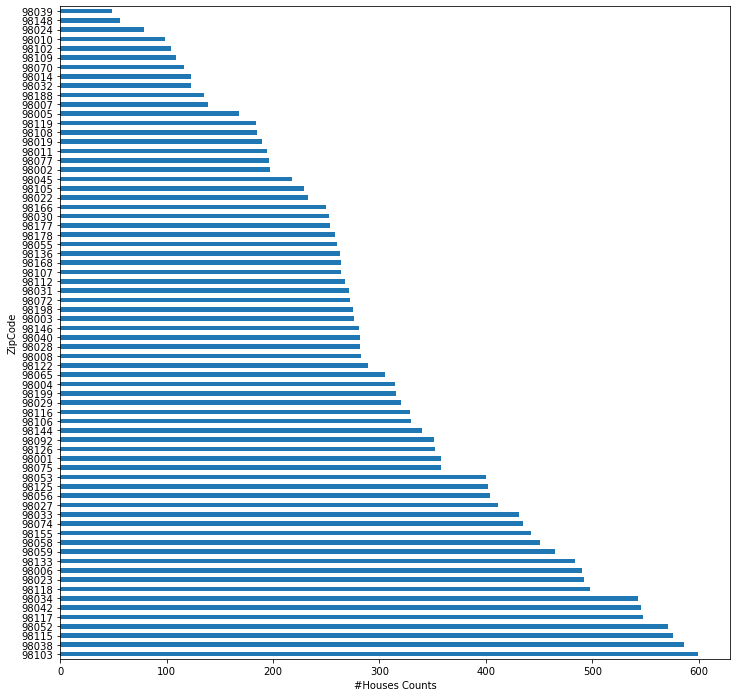

In [42]:
Housing_data['Zipcode'].value_counts().sort_values(ascending = False).plot(kind='barh', figsize = (12, 12))
plt.ylabel('ZipCode')
plt.xlabel('#Houses Counts')
plt.show()

In [43]:
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                21419 non-null  object        
 1   Transaction_Date  21419 non-null  datetime64[ns]
 2   Price             21419 non-null  float64       
 3   Bedroom_Count     21419 non-null  int64         
 4   Bathroom_Count    21419 non-null  float64       
 5   Sqft_Living       21419 non-null  int64         
 6   Sqft_Plot         21419 non-null  int64         
 7   Floor_Count       21419 non-null  float64       
 8   Waterfront        21419 non-null  int64         
 9   View              21419 non-null  int64         
 10  Condition         21419 non-null  int64         
 11  Grade             21419 non-null  int64         
 12  Sqft_Above        21419 non-null  int64         
 13  Sqft_Basement     21419 non-null  int64         
 14  Year_Built        2141

#### Sqft_Living

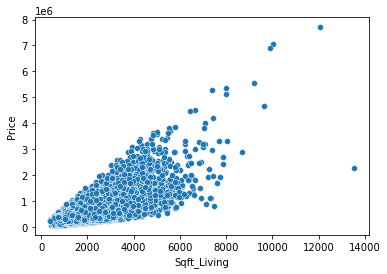

In [44]:
sns.scatterplot(x = 'Sqft_Living', y = 'Price', data = Housing_data);

In [45]:
# Investigating Outlier
Housing_data.sort_values(by = 'Sqft_Living', ascending = False).head(2).T

,12777,7252
Id,1225069038,6762700020
Transaction_Date,2014-05-05 00:00:00,2014-10-13 00:00:00
Price,2.28e+06,7.7e+06
Bedroom_Count,7,6
Bathroom_Count,8,8
Sqft_Living,13540,12050
Sqft_Plot,307752,27600
Floor_Count,3,2.5
Waterfront,0,0
View,4,3


In [46]:
Housing_data[Housing_data.Zipcode == 98053].sort_values(by = 'Price', ascending = False).head(2).T

,12777,8443
Id,1225069038,125069038
Transaction_Date,2014-05-05 00:00:00,2014-11-25 00:00:00
Price,2.28e+06,2.14e+06
Bedroom_Count,7,4
Bathroom_Count,8,3.75
Sqft_Living,13540,5150
Sqft_Plot,307752,453895
Floor_Count,3,2
Waterfront,0,0
View,4,3


In [47]:
Housing_data[Housing_data.Zipcode == 98102].sort_values(by = 'Price', ascending = False).head(2).T

,7252,4811
Id,6762700020,9831200500
Transaction_Date,2014-10-13 00:00:00,2015-03-04 00:00:00
Price,7.7e+06,2.479e+06
Bedroom_Count,6,5
Bathroom_Count,8,3.75
Sqft_Living,12050,6810
Sqft_Plot,27600,7500
Floor_Count,2.5,2.5
Waterfront,0,0
View,3,0


#### Sqft_Plot

<AxesSubplot:xlabel='Sqft_Plot', ylabel='Price'>

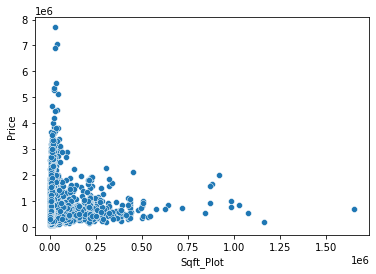

In [48]:
sns.scatterplot(x = 'Sqft_Plot', y = 'Price', data = Housing_data)

In [49]:
Housing_data['Plot-Living'] = Housing_data['Sqft_Plot'] - Housing_data['Sqft_Living']
Housing_data['Plot-Living_2015'] = Housing_data['Sqft_Plot_2015'] - Housing_data['Sqft_Living_2015']

In [50]:
Housing_data[Housing_data['Plot-Living'] < 0].head(5).T

,63,116,175,406,547
Id,9528102996,3362400431,7234600798,7821200390,7899800860
Transaction_Date,2014-12-07 00:00:00,2014-06-26 00:00:00,2015-02-10 00:00:00,2014-08-06 00:00:00,2015-03-19 00:00:00
Price,549000,518500,425000,450000,259950
Bedroom_Count,3,3,3,3,2
Bathroom_Count,1.75,3.5,2.5,2,2
Sqft_Living,1540,1590,1120,1290,1070
Sqft_Plot,1044,1102,1100,1213,649
Floor_Count,3,3,2,3,2
Waterfront,0,0,0,0,0
View,0,0,0,0,0


#### Sqft_Above

<AxesSubplot:xlabel='Sqft_Above', ylabel='Price'>

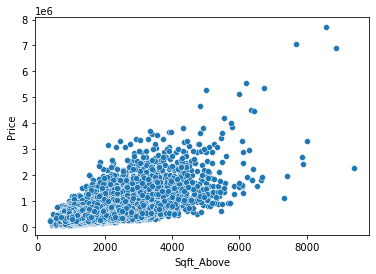

In [51]:
sns.scatterplot(x = 'Sqft_Above', y = 'Price', data = Housing_data)

#### Sqft_Basement

<AxesSubplot:xlabel='Sqft_Basement', ylabel='Price'>

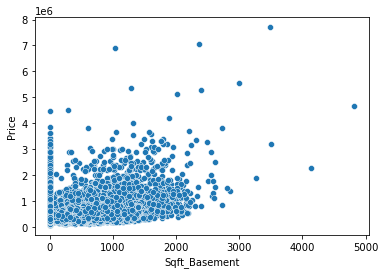

In [52]:
sns.scatterplot(x = 'Sqft_Basement', y = 'Price', data = Housing_data)

#### Sqft_Living_2015

<AxesSubplot:xlabel='Sqft_Living_2015', ylabel='Price'>

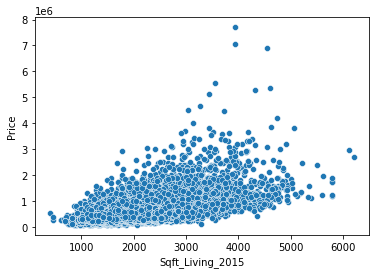

In [53]:
sns.scatterplot(x = 'Sqft_Living_2015', y = 'Price', data = Housing_data)

#### Sqft_Plot_2015

<AxesSubplot:xlabel='Sqft_Plot_2015', ylabel='Price'>

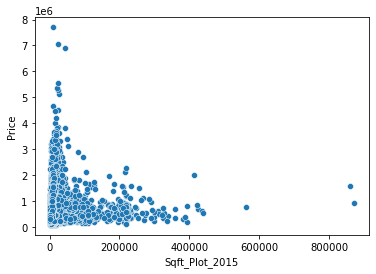

In [54]:
sns.scatterplot(x = 'Sqft_Plot_2015', y = 'Price', data = Housing_data)

##### Checking if living area is greater than Plot area and there is one floor and no basement

In [55]:
Housing_data[(Housing_data.Sqft_Living > Housing_data.Sqft_Plot) & (Housing_data.Sqft_Basement == 0) & (Housing_data.Floor_Count == 1)]

,Id,Transaction_Date,Price,Bedroom_Count,Bathroom_Count,Sqft_Living,Sqft_Plot,Floor_Count,Waterfront,View,...,Sqft_Basement,Year_Built,Year_Renovated,Zipcode,Latitude,Longitude,Sqft_Living_2015,Sqft_Plot_2015,Plot-Living,Plot-Living_2015
13278,3277800845,2014-07-11,370000.0,3,1.0,1170,1105,1.0,0,0,...,0,1965,0,98126,47.5448,-122.375,1380,1399,-65,19


This does not look right! I will drop this row


In [56]:
Clean_Housing_Data = Housing_data.drop(Housing_data.index[13278])

#### Checking for duplicate entries

In [57]:
Clean_Housing_Data[Clean_Housing_Data.duplicated(['Latitude', 'Longitude', 'Year_Built','Transaction_Date', 'Sqft_Living', 'Sqft_Plot'], keep = False)].T

,20354,20825
Id,255450020,255450030
Transaction_Date,2014-09-18 00:00:00,2014-09-18 00:00:00
Price,367899,369946
Bedroom_Count,3,3
Bathroom_Count,2.5,2.5
Sqft_Living,2420,2420
Sqft_Plot,4725,4725
Floor_Count,2,2
Waterfront,0,0
View,0,0


In [58]:
Clean_Housing_Data = Clean_Housing_Data.drop(Clean_Housing_Data.index[20825])

In [59]:
Clean_Housing_Data.shape

(21417, 23)

In [60]:
Clean_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21417 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                21417 non-null  object        
 1   Transaction_Date  21417 non-null  datetime64[ns]
 2   Price             21417 non-null  float64       
 3   Bedroom_Count     21417 non-null  int64         
 4   Bathroom_Count    21417 non-null  float64       
 5   Sqft_Living       21417 non-null  int64         
 6   Sqft_Plot         21417 non-null  int64         
 7   Floor_Count       21417 non-null  float64       
 8   Waterfront        21417 non-null  int64         
 9   View              21417 non-null  int64         
 10  Condition         21417 non-null  int64         
 11  Grade             21417 non-null  int64         
 12  Sqft_Above        21417 non-null  int64         
 13  Sqft_Basement     21417 non-null  int64         
 14  Year_Built        2141

### Zipcode wise data


In [61]:
zipcode = Clean_Housing_Data.groupby('Zipcode').agg(
    Listing_per_Zip_Code = pd.NamedAgg(column = 'Id', aggfunc = 'count'),
    ZipCode_Total_sqft_living = pd.NamedAgg(column = 'Sqft_Living', aggfunc = 'sum'),
    ZipCode_Total_sqft_lot = pd.NamedAgg(column = 'Sqft_Plot', aggfunc = 'sum'),
    ZipCode_Total_sqft_above = pd.NamedAgg(column = 'Sqft_Above', aggfunc = 'sum'),
    ZipCode_Total_sqft_basement = pd.NamedAgg(column = 'Sqft_Basement', aggfunc = 'sum'),
    ZipCode_Total_sqft_living15 = pd.NamedAgg(column = 'Sqft_Living_2015', aggfunc = 'sum'),
    ZipCode_Total_sqft_lot15 = pd.NamedAgg(column = 'Sqft_Plot_2015', aggfunc = 'sum'), 
    Zipcode_Median_housePrice = pd.NamedAgg(column = 'Price', aggfunc = 'median')
).reset_index()

In [62]:
zipcode

,Zipcode,Listing_per_Zip_Code,ZipCode_Total_sqft_living,ZipCode_Total_sqft_lot,ZipCode_Total_sqft_above,ZipCode_Total_sqft_basement,ZipCode_Total_sqft_living15,ZipCode_Total_sqft_lot15,Zipcode_Median_housePrice
0,98001,358,683156,5357969,618166,64990,655956,4009721,260000.0
1,98002,197,320601,1479322,299665,20936,291257,1494775,235000.0
2,98003,276,533077,2932538,459094,73983,518995,2696954,269500.0
3,98004,315,916880,4121578,761810,155070,841880,4031552,1150000.0
4,98005,168,446343,3348036,362913,83430,431401,3085786,765475.0
...,...,...,...,...,...,...,...,...,...
65,98177,254,590680,3027956,467092,123588,555300,2972908,557000.0
66,98178,258,448080,2143582,343070,105010,425830,2098145,279500.0
67,98188,135,243827,1368447,201583,42244,221234,1317681,265000.0
68,98198,275,481121,2902192,406391,74730,471880,2613086,266750.0


## Target Feature

price

## Save Data

In [63]:
#FilePath = 'C:\Users\Avinash Jha\Documents\Python\Springboard\GITHUB\HousingProject-Regression\Data'
Clean_Housing_Data.to_csv(r'..\Data\Clean_Housing_Data.csv')

In [64]:
zipcode.to_csv(r'..\Data\Zipcode_wise_summary.csv')

# Summary and Findings



**About the Data**
* Initial Data has 0 Null Values.
* Date column is object type.
* Properties are built between 1900-2015
* Mean condition is 3.4.
* ID and date together can be unique identifier.


**Challenges faced during Data Wrangling**
* Choosing the right Data type for each column that will be later used in modeling
* There were multiple transaction listed for same property. Which one to consider?


**Nominal Features**
* Id
* Zipcode


**Numerical features**
*	Sqft_Living
*	Sqft_Plot
*	Floor_Count
*	Sqft_Above
*	Sqft_Basement
*	Latitude
*   Longitude
*   Sqft_Living_2015
*   Sqft_plot_2015
*	View
*	Waterfront
*	Condition 
*	Grade
*	Bedroom_Count
*	Bathroom_Count
*	Year_Built
*	Year_Renovated


**Target feature is Price**


**Also**
* Created two features by subtracting Living Sqft from Plot sqft, same for 2015
* Created a zipcode wise summary